# Data Cleaning on fianncial Regression Data


## Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
# read dataset
df = pd.read_csv('data/financial_regression.csv')

# Display all columns
pd.set_option('display.max_columns', None)

# copy original df for cleaning process while analysis on original 
df_copy = df.copy()

In [16]:
df.head()

date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0  2010-01-14      114.49      115.14     114.42       114.93   115646960.0   
1  2010-01-15      114.73      114.84     113.20       113.64   212252769.0   
2  2010-01-18         NaN         NaN        NaN          NaN           NaN   
3  2010-01-19      113.62      115.13     113.59       115.06   138671890.0   
4  2010-01-20      114.28      114.45     112.98       113.89   216330645.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
0            0.72        46.26       46.520       46.22         46.39   
1            1.64        46.46       46.550       45.65         45.85   
2             NaN          NaN          NaN         NaN           NaN   
3            1.54        45.96       46.640       45.95         46.59   
4            1.47        46.27       46.604       45.43         45.92   

   nasdaq volume  nasdaq high-low  us_rates_%  CPI  usd_chf  eur_usd  GDP  \
0     75209000.0            0.300         NaN  NaN   1.0206   1.4478  NaN   
1    126849300.0            0.900         NaN  NaN   1.0264   1.4376  NaN   
2            NaN              NaN         NaN  NaN      NaN      NaN  NaN   
3     84388200.0            0.690         NaN  NaN   1.0340   1.4269  NaN   
4    145680000.0            1.174         NaN  NaN   1.0453   1.4094  NaN   

   silver open  silver high  silver low  silver close  silver volume  \
0        18.58        18.70       18.45         18.66        69804.0   
1        18.54        18.54       18.36         18.41       205106.0   
2          NaN          NaN         NaN           NaN            NaN   
3        18.53        18.79       18.50         18.79       130552.0   
4        18.31        18.31       17.78         17.86       230907.0   

   silver high-low  oil open  oil high  oil low  oil close  oil volume  \
0             0.25     39.30   39.4400    38.88      39.06   8575821.0   
1             0.18     38.97   39.0200    38.28      38.40  12615299.0   
2              NaN       NaN       NaN      NaN        NaN         NaN   
3             0.29     38.07   38.9499    38.03      38.93   8180157.0   
4             0.53     38.23   38.3500    37.88      37.89  11438685.0   

   oil high-low  platinum open  platinum high  platinum low  platinum close  \
0        0.5600         160.13         161.85      159.7200          161.45   
1        0.7400         160.68         161.25      159.5000          160.25   
2           NaN            NaN            NaN           NaN             NaN   
3        0.9199         162.23         165.20      162.1722          165.12   
4        0.4700         163.51         163.51      159.0900          163.22   

   platinum volume  platinum high-low  palladium open  palladium high  \
0         228500.0             2.1300           43.93           45.02   
1         189900.0             1.7500           45.18           45.76   
2              NaN                NaN             NaN             NaN   
3         295900.0             3.0278           46.01           47.08   
4         438200.0             4.4200           46.59           47.31   

   palladium low  palladium close  palladium volume  palladium high-low  \
0          43.86            44.84          364528.0                1.16   
1          44.40            45.76          442210.0                1.36   
2            NaN              NaN               NaN                 NaN   
3          45.70            46.94          629150.0                1.38   
4          45.17            47.05          643198.0                2.14   

   gold open  gold high  gold low  gold close  gold volume  
0     111.51     112.37    110.79      112.03   18305238.0  
1     111.35     112.01    110.38      110.86   18000724.0  
2        NaN        NaN       NaN         NaN          NaN  
3     110.95     111.75    110.83      111.52   10467927.0  
4     109.97     110.05    108.46      108.94   17534231.0

In [17]:
# shape of dataset
df.shape

(3904, 47)

## 1. Data Cleaning for our data 
- Remove date columns for now
- Check Missing Values
- Check Duplicated records
- Check Data types

### 1.1. Remove date column:


In [18]:
# remove date column
df_copy = df_copy.drop('date', axis=1)
df_copy.head(1)

sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0      114.49      115.14     114.42       114.93   115646960.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
0            0.72        46.26        46.52       46.22         46.39   

   nasdaq volume  nasdaq high-low  us_rates_%  CPI  usd_chf  eur_usd  GDP  \
0     75209000.0              0.3         NaN  NaN   1.0206   1.4478  NaN   

   silver open  silver high  silver low  silver close  silver volume  \
0        18.58         18.7       18.45         18.66        69804.0   

   silver high-low  oil open  oil high  oil low  oil close  oil volume  \
0             0.25      39.3     39.44    38.88      39.06   8575821.0   

   oil high-low  platinum open  platinum high  platinum low  platinum close  \
0          0.56         160.13         161.85        159.72          161.45   

   platinum volume  platinum high-low  palladium open  palladium high  \
0         228500.0               2.13           43.93           45.02   

   palladium low  palladium close  palladium volume  palladium high-low  \
0          43.86            44.84          364528.0                1.16   

   gold open  gold high  gold low  gold close  gold volume  
0     111.51     112.37    110.79      112.03   18305238.0

### 1.2. Remove or replace missing values 
- If ther are more than 70% missing values are in a column, then we remove those column, 
- if there are less missing values, then we drop those records

In [19]:
# count of missing values for each column
df_copy.isnull().sum()

sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
palladium high         185
p

In [20]:
# percentage of missing values in each columns
df_copy.isnull().mean()*100

sp500 open             4.738730
sp500 high             4.738730
sp500 low              4.738730
sp500 close            4.738730
sp500 volume           4.738730
sp500 high-low         4.738730
nasdaq open            4.738730
nasdaq high            4.738730
nasdaq low             4.738730
nasdaq close           4.738730
nasdaq volume          4.738730
nasdaq high-low        4.738730
us_rates_%            95.491803
CPI                   95.491803
usd_chf                5.379098
eur_usd                5.379098
GDP                   98.539959
silver open            4.738730
silver high            4.738730
silver low             4.738730
silver close           4.738730
silver volume          4.738730
silver high-low        4.738730
oil open               4.738730
oil high               4.738730
oil low                4.738730
oil close              4.738730
oil volume             4.738730
oil high-low           4.738730
platinum open          4.738730
platinum high          4.738730
platinum

In [21]:
high_missing_columns = df.isnull().mean() * 100
high_missing_columns = high_missing_columns[high_missing_columns > 70]  # Filter columns with >70% missing values

print(high_missing_columns)  # Display column names and their missing percentages

us_rates_%    95.491803
CPI           95.491803
GDP           98.539959
dtype: float64


In [22]:
# drop 3 columns which are having more than 90% missing data
df_copy = df_copy.drop(['us_rates_%', 'CPI', 'GDP'], axis = 1)
df_copy.shape


(3904, 43)

In [23]:
# check all missing values records
missing_records = df_copy[df_copy.isnull().any(axis=1)]
missing_records


sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
2            NaN         NaN        NaN          NaN           NaN   
22           NaN         NaN        NaN          NaN           NaN   
56           NaN         NaN        NaN          NaN           NaN   
77           NaN         NaN        NaN          NaN           NaN   
98           NaN         NaN        NaN          NaN           NaN   
...          ...         ...        ...          ...           ...   
3866         NaN         NaN        NaN          NaN           NaN   
3896      581.22    585.2700   580.7300       584.32    36217215.0   
3901      583.85    584.8500   580.6001       583.63    36439010.0   
3902      581.05    584.5000   580.3800       583.32    34183835.0   
3903      581.26    581.7086   574.4150       577.99    47444991.0   

      sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
2                NaN          NaN          NaN         NaN           NaN   
22               NaN          NaN          NaN         NaN           NaN   
56               NaN          NaN          NaN         NaN           NaN   
77               NaN          NaN          NaN         NaN           NaN   
98               NaN          NaN          NaN         NaN           NaN   
...              ...          ...          ...         ...           ...   
3866             NaN          NaN          NaN         NaN           NaN   
3896          4.5400       495.77      498.830      495.26        497.50   
3901          4.2499       493.25      496.230      491.31        495.42   
3902          4.1200       492.73      497.445      491.97        495.96   
3903          7.2936       493.59      494.250      485.05        488.36   

      nasdaq volume  nasdaq high-low  usd_chf  eur_usd  silver open  \
2               NaN              NaN      NaN      NaN          NaN   
22              NaN              NaN      NaN      NaN          NaN   
56              NaN              NaN   1.0632   1.3487          NaN   
77              NaN              NaN      NaN      NaN          NaN   
98              NaN              NaN      NaN      NaN          NaN   
...             ...              ...      ...      ...          ...   
3866            NaN              NaN      NaN      NaN          NaN   
3896     26060145.0            3.570      NaN      NaN        29.82   
3901     30336549.0            4.920      NaN      NaN        32.63   
3902     26685841.0            5.475      NaN      NaN        32.91   
3903     38295450.0            9.200      NaN      NaN        32.58   

      silver high  silver low  silver close  silver volume  silver high-low  \
2             NaN         NaN           NaN            NaN              NaN   
22            NaN         NaN           NaN            NaN              NaN   
56            NaN         NaN           NaN            NaN              NaN   
77            NaN         NaN           NaN            NaN              NaN   
98            NaN         NaN           NaN            NaN              NaN   
...           ...         ...           ...            ...              ...   
3866          NaN         NaN           NaN            NaN              NaN   
3896      30.0900      29.635         29.89       481093.0           0.4550   
3901      32.7150      31.980         32.32      1446558.0           0.7350   
3902      33.3100      32.730         33.23      1702196.0           0.5800   
3903      32.5925      31.930         32.15      1344601.0           0.6625   

      oil open  oil high  oil low  oil close  oil volume  oil high-low  \
2          NaN       NaN      NaN        NaN         NaN           NaN   
22         NaN       NaN      NaN        NaN         NaN           NaN   
56         NaN       NaN      NaN        NaN         NaN           NaN   
77         NaN       NaN      NaN        NaN         NaN           NaN   
98         NaN       NaN      NaN        NaN         NaN           NaN   
...   

In [24]:
# lets drop all missing data records from df_copy
df_cleaned = df_copy.dropna()
df_cleaned.shape

(3677, 43)

In [25]:
# lets check missing values now
df_cleaned.isnull().sum()

sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low              0
gold close      

- We have remove all missing data and columns with most missing data.

### 1.3. Remove Duplicated Records

In [26]:
# check duplicated
df_cleaned.duplicated().sum()

np.int64(0)

- There is no any duplicated record after drop missing data.

### 1.4. data type check

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3900
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500 open          3677 non-null   float64
 1   sp500 high          3677 non-null   float64
 2   sp500 low           3677 non-null   float64
 3   sp500 close         3677 non-null   float64
 4   sp500 volume        3677 non-null   float64
 5   sp500 high-low      3677 non-null   float64
 6   nasdaq open         3677 non-null   float64
 7   nasdaq high         3677 non-null   float64
 8   nasdaq low          3677 non-null   float64
 9   nasdaq close        3677 non-null   float64
 10  nasdaq volume       3677 non-null   float64
 11  nasdaq high-low     3677 non-null   float64
 12  usd_chf             3677 non-null   float64
 13  eur_usd             3677 non-null   float64
 14  silver open         3677 non-null   float64
 15  silver high         3677 non-null   float64
 16  silver low 

### 1.5. Statistical summary


In [29]:
df_cleaned.describe()

sp500 open   sp500 high    sp500 low  sp500 close  sp500 volume  \
count  3677.000000  3677.000000  3677.000000  3677.000000  3.677000e+03   
mean    268.399897   269.847805   266.821621   268.445118  1.127705e+08   
std     121.150274   121.800248   120.436525   121.165512  6.915216e+07   
min     103.110000   103.420000   101.130000   102.200000  1.708170e+05   
25%     169.530000   169.900000   168.770000   169.400000  6.742900e+07   
50%     240.080000   241.880000   239.040000   240.300000  9.267393e+07   
75%     373.810000   377.660000   371.040000   374.220000  1.373036e+08   
max     585.910000   586.120000   582.580000   584.590000  7.095045e+08   

       sp500 high-low  nasdaq open  nasdaq high   nasdaq low  nasdaq close  \
count     3677.000000  3677.000000  3677.000000  3677.000000   3677.000000   
mean         3.026184   181.051810   182.343200   179.638118    181.084400   
std          2.662347   122.226772   123.147615   121.188607    122.223657   
min          0.300000    42.670000    42.821500    41.550000     42.470000   
25%          1.290000    78.270000    78.790000    77.920000     78.370000   
50%          2.100000   138.440000   139.075000   137.740000    138.600000   
75%          3.780000   283.400000   286.830000   280.840000    284.210000   
max         22.960000   503.070000   503.520000   498.390000    502.960000   

       nasdaq volume  nasdaq high-low      usd_chf      eur_usd  silver open  \
count   3.677000e+03      3677.000000  3677.000000  3677.000000  3677.000000   
mean    4.542718e+07         2.705082     0.947309     1.191364    21.429070   
std     2.620833e+07         2.774374     0.052287     0.113478     6.237274   
min     7.079300e+06         0.170000     0.729600     0.961600    11.700000   
25%     2.721066e+07         0.790000     0.912000     1.100000    16.490000   
50%     3.915020e+07         1.465000     0.946800     1.159100    19.750000   
75%     5.635949e+07         3.900000     0.983100     1.295400    24.520000   
max     2.882004e+08        22.780000     1.161400     1.487500    48.550000   

       silver high   silver low  silver close  silver volume  silver high-low  \
count  3677.000000  3677.000000   3677.000000   3.677000e+03      3677.000000   
mean     21.602672    21.229368     21.422308   3.861190e+05         0.373303   
std       6.327592     6.117309      6.233822   4.980778e+05         0.340367   
min      11.890000    11.300000     11.640000   1.494100e+04         0.040000   
25%      16.600000    16.370000     16.480000   9.494200e+04         0.170000   
50%      19.880000    19.600000     19.720000   2.087270e+05         0.280000   
75%      24.700000    24.310000     24.530000   5.048810e+05         0.450000   
max      49.280000    47.480000     48.200000   7.374159e+06         4.310000   

          oil open     oil high      oil low    oil close    oil volume  \
count  3677.000000  3677.000000  3677.000000  3677.000000  3.677000e+03   
mean     34.663565    35.018262    34.274290    34.658188  1.633186e+07   
std      21.885087    22.113974    21.622327    21.874607  3.052597e+07   
min       2.160000     2.250000     2.110000     2.130000  7.346540e+05   
25%      13.020000    13.170000    12.900000    13.030000  4.647785e+06   
50%      33.940000    34.270000    33.640000    33.960000  9.331094e+06   
75%      41.970000    42.420000    41.600000    42.050000  2.115204e+07   
max      91.030000    92.200000    90.720000    91.990000  9.989044e+08   

       oil high-low  platinum open  platinum high  platinum low  \
count   3677.000000    3677.000000    3677.000000   3677.000000   
mean       0.743972     111.559204     112.224658    110.824390   
std        0.672679      31.982882      32.061514     31.865022   
min        0.058000      56.700000      56.880000     55.000000   
25%        0.290000      87.040000      87.730000     86.470000   
50%        0.530000      95.470000      95.990500     94.700000   
75%        0.960000     141.14000

## 2. Exploratory Data Analysis on Cleaned Data

### 2.1. Check std and mean relation and deviation

In [30]:
# Iterate through numeric columns and check std vs mean
print("\nAnalysis of Standard Deviation vs Mean:\n")
for i, col in enumerate(df_cleaned.columns, start=1):
    mean_value = df_cleaned[col].mean()
    std_value = df_cleaned[col].std()
    
    # Print column details
    print(f"{i}) Column Name: {col} : ")
    print(f"   → Std ({std_value:.2f}) is {'less than' if std_value < mean_value else 'greater than'} Mean ({mean_value:.2f})")
    
    # Conclusion
    if std_value < mean_value:
        print("   → The data is less spread out and values are close to the mean.\n")
    else:
        print("   → The data is highly spread out with significant variability.\n")

    print("-----*****------")


Analysis of Standard Deviation vs Mean:

1) Column Name: sp500 open : 
   → Std (121.15) is less than Mean (268.40)
   → The data is less spread out and values are close to the mean.

-----*****------
2) Column Name: sp500 high : 
   → Std (121.80) is less than Mean (269.85)
   → The data is less spread out and values are close to the mean.

-----*****------
3) Column Name: sp500 low : 
   → Std (120.44) is less than Mean (266.82)
   → The data is less spread out and values are close to the mean.

-----*****------
4) Column Name: sp500 close : 
   → Std (121.17) is less than Mean (268.45)
   → The data is less spread out and values are close to the mean.

-----*****------
5) Column Name: sp500 volume : 
   → Std (69152164.41) is less than Mean (112770453.69)
   → The data is less spread out and values are close to the mean.

-----*****------
6) Column Name: sp500 high-low : 
   → Std (2.66) is less than Mean (3.03)
   → The data is less spread out and values are close to the mean.

--

### 2.2. Univariate Analysis of cleaned df
- Here we check each feature data , its spread, skewness, plots for  etc...
  - 1️⃣ Check Skewness → .skew() and Perform Normality Test → Shapiro-Wilk / K-S test
  - 2️⃣ Plot Histogram + KDE → To visualize distribution
  - 3️⃣ Check Boxplot → To identify outliers
  - 4️⃣ Calculate IQR & Z-score → For potential outliers

  

#### 2.2.1. Check Skewness → .skew() and Perform Normality Test → Shapiro-Wilk / K-S test

In [37]:
import pandas as pd
from scipy.stats import shapiro

def check_skewness_normality(df):
    # Initialize empty list to store results
    results = []

    # Loop through each column in the dataframe
    for column in df.columns:
        data = df[column].dropna()

        # Perform Shapiro-Wilk test for normality
        stat, p_value = shapiro(data)
        shapiro_result = 'Normal' if p_value > 0.05 else 'Not Normal'

        # Calculate skewness
        skewness_value = data.skew()

        # Determine skewness result and transformation method
        if skewness_value > 1:  # Right Skewed
            skewness_result = 'Right Skewed'
            if (data > 0).all():  
                transformation_method = 'Log Transformation'
            else:  
                transformation_method = 'Yeo-Johnson Transformation'
        elif skewness_value < -1:  # Left Skewed
            skewness_result = 'Left Skewed'
            transformation_method = 'Power Transformation (e.g., Square)'
        else:
            skewness_result = 'Approximately Normal'
            if shapiro_result == 'Not Normal':
                if (data > 0).all():
                    transformation_method = 'Box-Cox Transformation'
                else:
                    transformation_method = 'Yeo-Johnson Transformation'
            else:
                transformation_method = 'None'

        # Append the results for the column
        results.append([column, skewness_value, skewness_result, p_value, shapiro_result, transformation_method])

    # Convert results to a DataFrame
    skewness_normality_df = pd.DataFrame(results, columns=['Column', 'Skewness Value', 'Skewness Result', 'Shapiro P-Value', 'Shapiro Result', 'Transformation Method'])
    
    return skewness_normality_df


In [38]:
# check df for skewness
skewness_normality_df = check_skewness_normality(df=df_cleaned)
skewness_normality_df

Column  Skewness Value       Skewness Result  Shapiro P-Value  \
0           sp500 open        0.607262  Approximately Normal     1.439209e-38   
1           sp500 high        0.604929  Approximately Normal     1.023722e-38   
2            sp500 low        0.608798  Approximately Normal     2.040086e-38   
3          sp500 close        0.607109  Approximately Normal     1.431209e-38   
4         sp500 volume        2.440629          Right Skewed     1.805245e-55   
5       sp500 high-low        2.312241          Right Skewed     2.005873e-58   
6          nasdaq open        0.816443  Approximately Normal     1.394707e-46   
7          nasdaq high        0.812115  Approximately Normal     1.182981e-46   
8           nasdaq low        0.819113  Approximately Normal     1.680147e-46   
9         nasdaq close        0.815196  Approximately Normal     1.408581e-46   
10       nasdaq volume        2.167872          Right Skewed     1.294506e-51   
11     nasdaq high-low        1.966769          Right Skewed     1.328185e-57   
12             usd_chf        0.263546  Approximately Normal     3.153078e-23   
13             eur_usd        0.528359  Approximately Normal     3.813596e-38   
14         silver open        1.080209          Right Skewed     5.815206e-43   
15         silver high        1.088123          Right Skewed     4.044436e-43   
16          silver low        1.060286          Right Skewed     1.078914e-42   
17        silver close        1.077138          Right Skewed     5.778443e-43   
18       silver volume        4.178772          Right Skewed     1.229877e-66   
19     silver high-low        3.829435          Right Skewed     9.672158e-64   
20            oil open        0.664485  Approximately Normal     1.231867e-44   
21            oil high        0.669110  Approximately Normal     9.299270e-45   
22             oil low        0.657192  Approximately Normal     1.724432e-44   
23           oil close        0.662847  Approximately Normal     1.400169e-44   
24          oil volume       17.645004          Right Skewed     2.163957e-79   
25        oil high-low        2.565707          Right Skewed     1.134336e-57   
26       platinum open        0.751194  Approximately Normal     2.771544e-49   
27       platinum high        0.751891  Approximately Normal     2.850573e-49   
28        platinum low        0.750140  Approximately Normal     2.414582e-49   
29      platinum close        0.752100  Approximately Normal     2.414947e-49   
30     platinum volume        3.109621          Right Skewed     2.613931e-60   
31   platinum high-low        2.019152          Right Skewed     3.374993e-50   
32      palladium open        1.120804          Right Skewed     8.029557e-52   
33      palladium high        1.120015          Right Skewed     6.383156e-52   
34       palladium low        1.121441          Right Skewed     1.207386e-51   
35     palladium close        1.121812          Right Skewed     8.974816e-52   
36    palladium volume        4.339088          Right Skewed     3.168093e-69   
37  palladium high-low        5.188953          Right Skewed     2.770595e-68   
38           gold open        0.753772  Approximately Normal     1.514756e-40   
39           gold high        0.752702  Approximately Normal     1.363675e-40   
40            gold low        0.758207  Approximately Normal     1.606244e-40   
41          gold close        0.756198  Approximately Normal     1.508935e-40   
42         gold volume        3.196795          Right Skewed     6.139705e-59   

   Shapiro Result   Transformation Method  
0      Not Normal  Box-Cox Transformation  
1      Not Normal  Box-Cox Transformation  
2      Not Normal  Box-Cox Transformation  
3      Not Normal  Box-Cox Transformation  
4      Not Normal      Log Transformation  
5      Not Normal      Log Transformation  
6      Not Normal  Box-Cox Transformation  
7      Not Normal  Box-Cox Transformation  
8      Not Normal  Box-Cox Transformation  
9      Not 

#### 2.2.2.  Plot Histogram + KDE → To visualize distribution

In [50]:
# fuction to plot the histogram with kde for each column

def plot_histograms_kde(df):
    # Select only numerical columns
    numerical_columns = df_cleaned.columns
    num_columns = len(numerical_columns)  # Number of numerical columns

    # Define number of columns per row
    cols_per_row = 5 
    num_rows = int(np.ceil(num_columns / cols_per_row))  # Calculate required rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(18, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Loop through numerical columns and plot each
    for i, column in enumerate(numerical_columns):
        sns.histplot(df[column], kde=True, ax=axes[i], bins=30, color='skyblue')
        
        # Set title and labels for each subplot
        axes[i].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        
        # Add grid for better readability
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [41]:
df_cleaned.shape

(3677, 43)

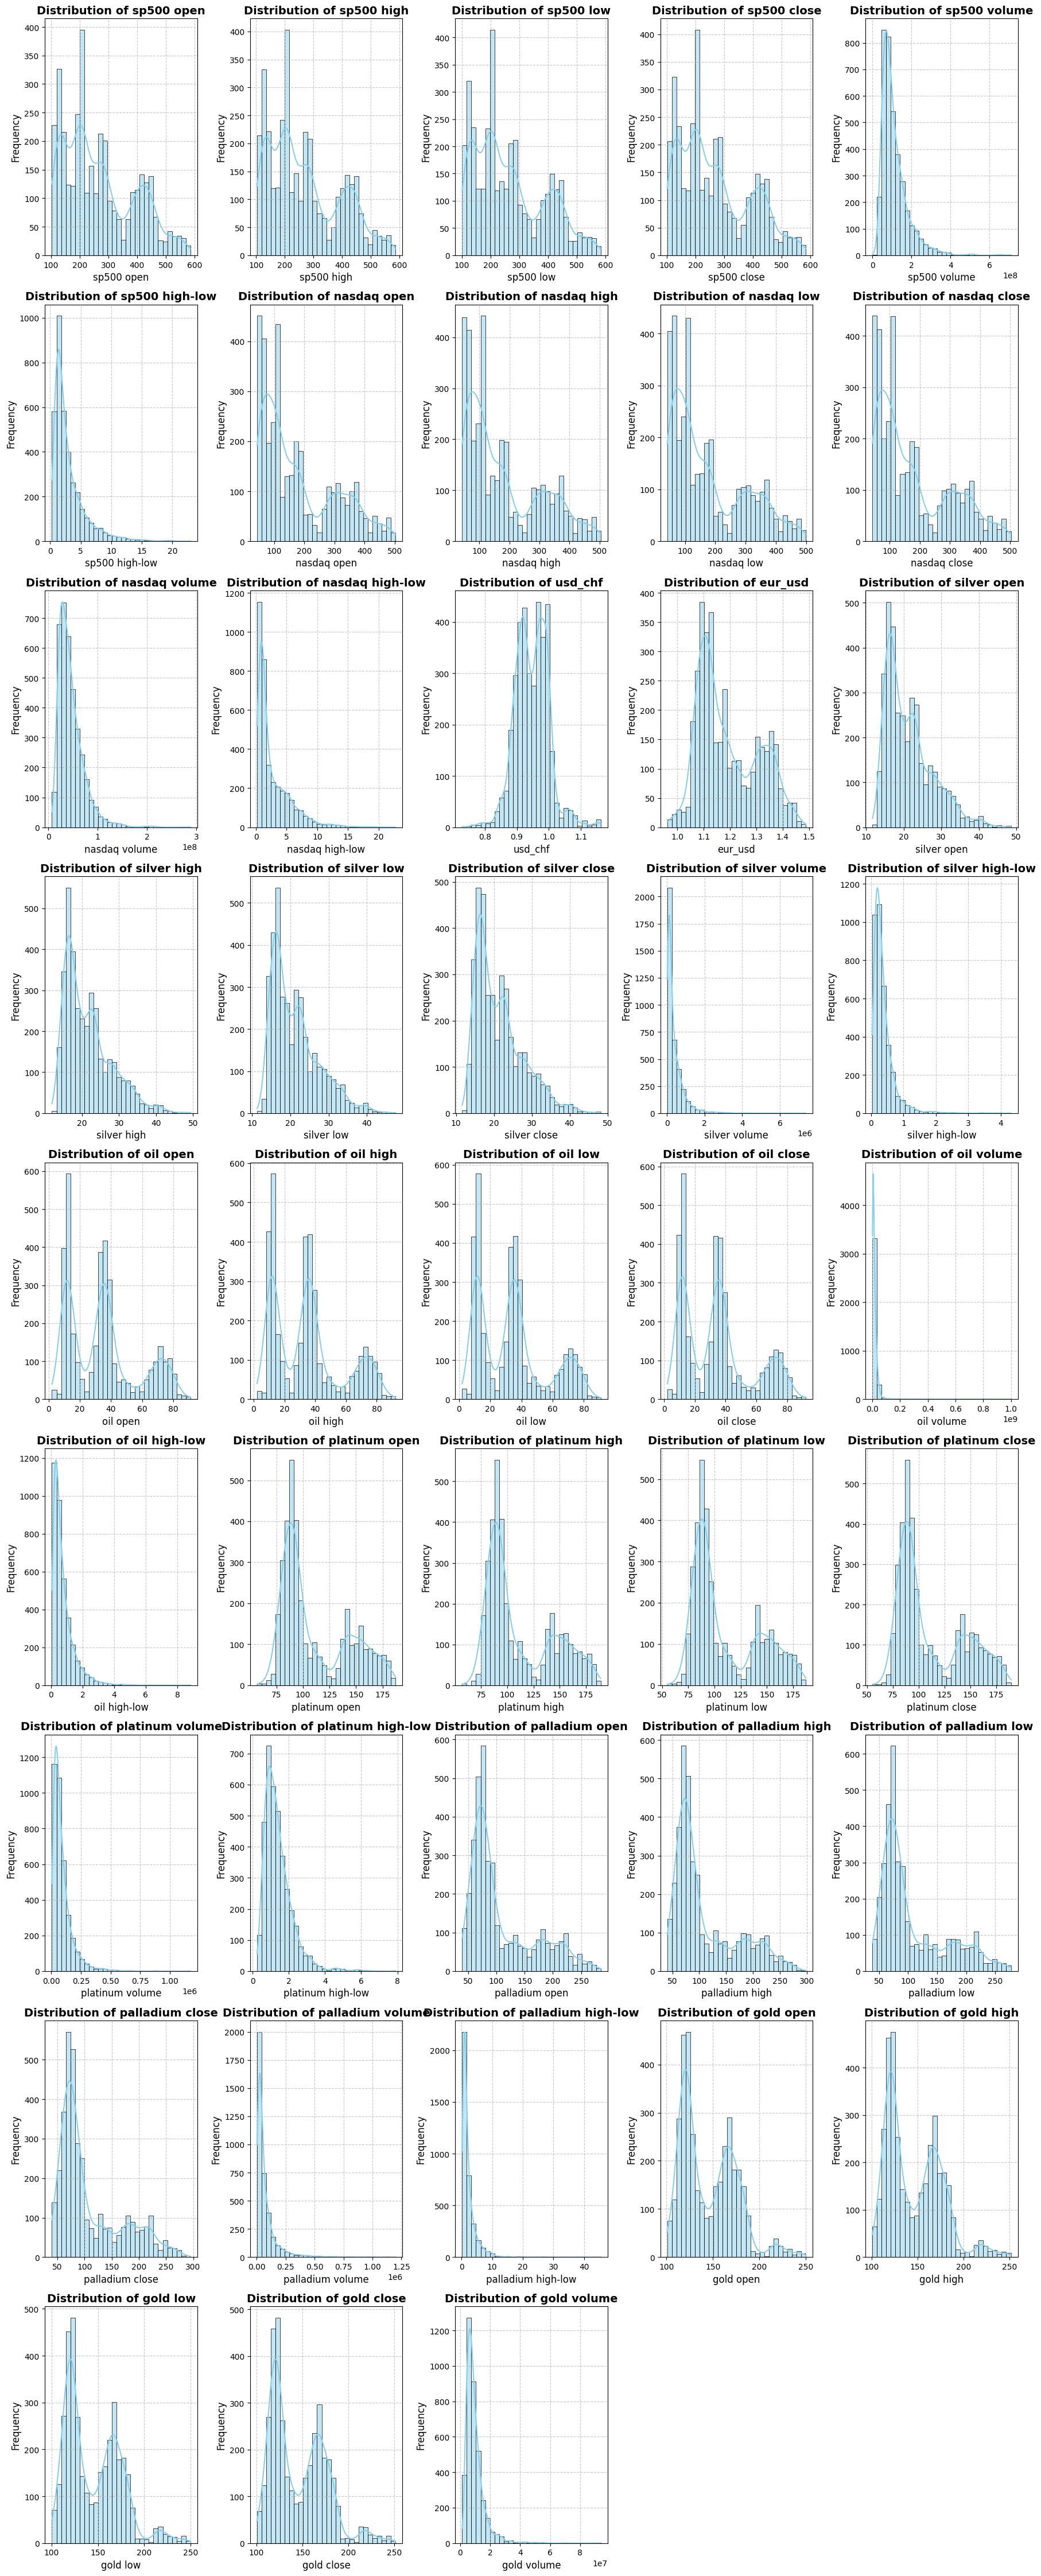

In [51]:
# plots
plot_histograms_kde(df=df_cleaned)

#### 2.2.3. Check Boxplot → To identify outliers

In [56]:
# boxplot
def plot_boxplots(df):
    # Set plot size for better readability
    plt.figure(figsize=(12, 6))

    # Get numerical columns
    num_columns = df.columns
    
    # Number of subplots (one for each numerical column)
    num_plots = len(num_columns)
    
    # Calculate number of rows and columns for subplots
    rows = (num_plots // 3) + (num_plots % 3)  # if odd number of plots, one extra row
    cols = 3 if num_plots > 1 else 1

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
    axes = axes.flatten()  # Flatten in case of multi-row layout
    
    # Loop through numerical columns and plot each
    for i, column in enumerate(num_columns):
        sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
        
        # Set title and labels for each subplot
        axes[i].set_title(f'{column} Distribution', fontsize=14)
        axes[i].set_xlabel(f'{column}', fontsize=12)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

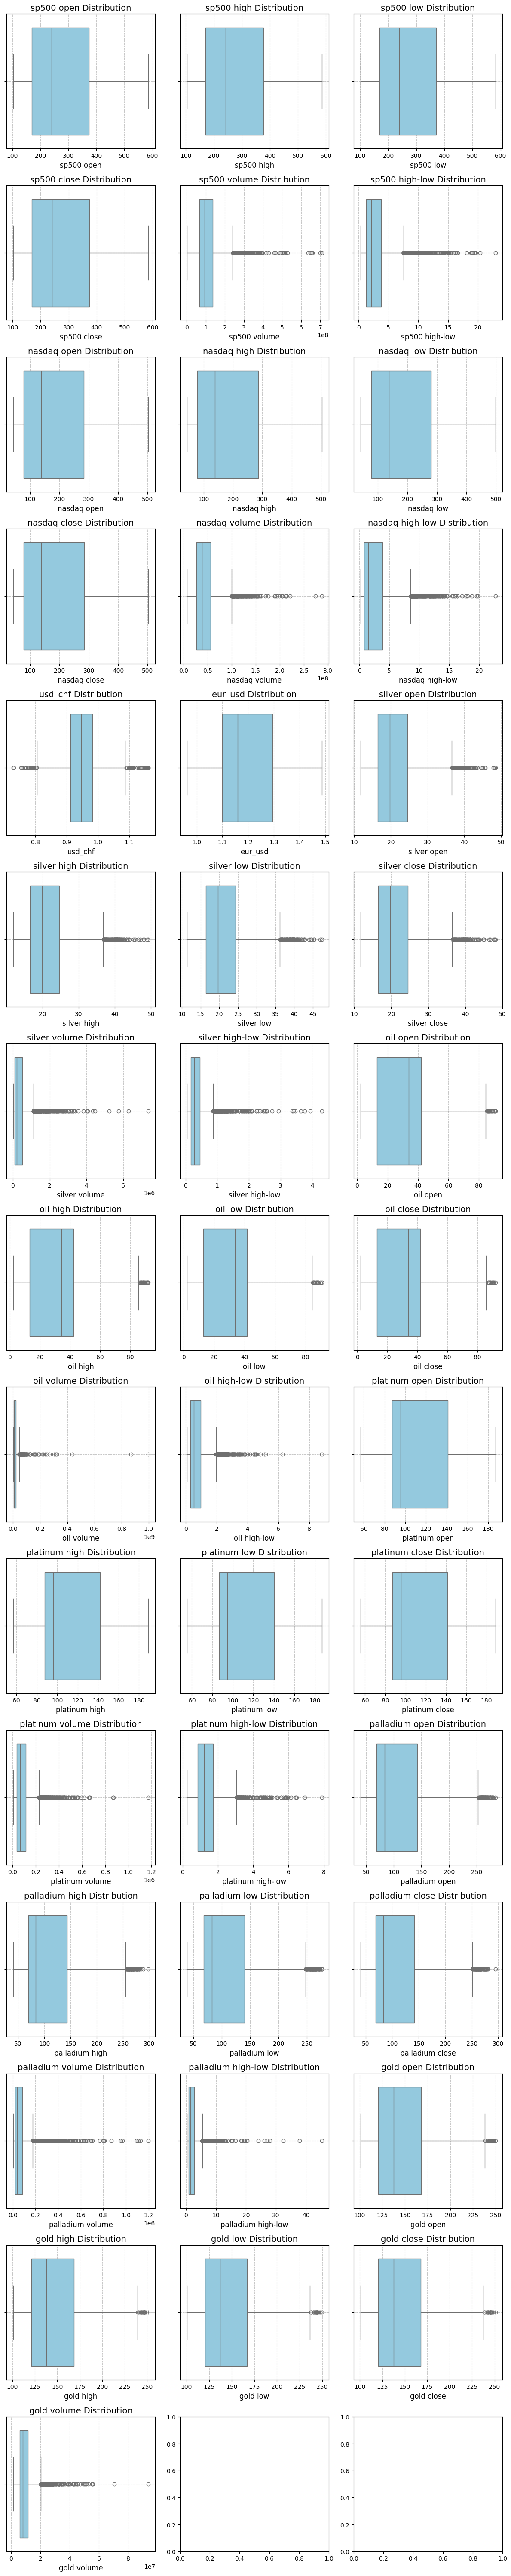

In [57]:
# plot boxplot to see outliers
plot_boxplots(df = df_cleaned)

#### 2.2.4. Calculate IQR & Z-score → For potential outliers

In [65]:
from scipy.stats import zscore

def detect_outliers_iqr_zscore(df, z_threshold=3):
    results = []
    outlier_rows = pd.DataFrame()  # Initialize an empty DataFrame to store outliers
    
    # Loop through each numerical column
    for column in df.columns:
        # Calculate IQR (Interquartile Range)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate Lower and Upper Fences
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        # Count outliers based on the IQR method
        outliers_mask = (df[column] < lower_fence) | (df[column] > upper_fence)
        outliers_count = outliers_mask.sum()

        # Collect IQR-based outliers
        if outliers_count > 0:
            outlier_rows = pd.concat([outlier_rows, df[outliers_mask]])
        

        # Calculate Z-score for the column
        z_scores = zscore(df[column].dropna())
        
        # Count outliers based on Z-score (if |z_score| > threshold)
        z_outliers_count = (np.abs(z_scores) > z_threshold).sum()

        # Collect results for each column
        results.append([column, outliers_count, np.round(lower_fence, 6), np.round(df[column].min(), 6), 
                        np.round(upper_fence, 6), np.round(df[column].max(), 6),  z_outliers_count])

    # Convert results to a DataFrame
    outlier_df = pd.DataFrame(results, columns=['Column', 'Outlier Count (IQR)', 'Lower Fence', 'Min Value', 'Upper Fence', 'Max Value','Outlier Count (Z-score)'])
    
    return outlier_df, outlier_rows.drop_duplicates()

In [66]:
outlier_df , outlier_rows= detect_outliers_iqr_zscore(df = df_cleaned)
outlier_df

Column  Outlier Count (IQR)   Lower Fence     Min Value  \
0           sp500 open                    0 -1.368900e+02  1.031100e+02   
1           sp500 high                    0 -1.417400e+02  1.034200e+02   
2            sp500 low                    0 -1.346350e+02  1.011300e+02   
3          sp500 close                    0 -1.378300e+02  1.022000e+02   
4         sp500 volume                  187 -3.738288e+07  1.708170e+05   
5       sp500 high-low                  254 -2.445000e+00  3.000000e-01   
6          nasdaq open                    0 -2.294250e+02  4.267000e+01   
7          nasdaq high                    0 -2.332700e+02  4.282150e+01   
8           nasdaq low                    0 -2.264600e+02  4.155000e+01   
9         nasdaq close                    0 -2.303900e+02  4.247000e+01   
10       nasdaq volume                  134 -1.651259e+07  7.079300e+06   
11     nasdaq high-low                  162 -3.875000e+00  1.700000e-01   
12             usd_chf                   65  8.053500e-01  7.296000e-01   
13             eur_usd                    0  8.069000e-01  9.616000e-01   
14         silver open                   93  4.445000e+00  1.170000e+01   
15         silver high                   96  4.450000e+00  1.189000e+01   
16          silver low                   88  4.460000e+00  1.130000e+01   
17        silver close                   90  4.405000e+00  1.164000e+01   
18       silver volume                  232 -5.199665e+05  1.494100e+04   
19     silver high-low                  226 -2.500000e-01  4.000000e-02   
20            oil open                   16 -3.040500e+01  2.160000e+00   
21            oil high                   16 -3.070500e+01  2.250000e+00   
22             oil low                   13 -3.015000e+01  2.110000e+00   
23           oil close                   11 -3.050000e+01  2.130000e+00   
24          oil volume                  163 -2.010860e+07  7.346540e+05   
25        oil high-low                  216 -7.150000e-01  5.800000e-02   
26       platinum open                    0  5.890000e+00  5.670000e+01   
27       platinum high                    0  6.595000e+00  5.688000e+01   
28        platinum low                    0  5.605000e+00  5.500000e+01   
29      platinum close                    0  5.600000e+00  5.536000e+01   
30     platinum volume                  225 -7.958850e+04  4.833000e+03   
31   platinum high-low                  134 -4.477500e-01  2.379000e-01   
32      palladium open                   68 -4.152500e+01  3.963000e+01   
33      palladium high                   69 -4.185015e+01  4.055000e+01   
34       palladium low                   76 -3.966000e+01  3.849000e+01   
35     palladium close                   74 -4.048000e+01  4.009000e+01   
36    palladium volume                  323 -7.372850e+04  3.157000e+03   
37  palladium high-low                  296 -1.845000e+00  2.300000e-01   
38           gold open                   21  4.977500e+01  1.009200e+02   
39           gold high                   22  5.006500e+01  1.009900e+02   
40            gold low                   23  4.999500e+01  1.002326e+02   
41          gold close                   23  4.977500e+01  1.005000e+02   
42         gold volume                  195 -2.859579e+06  1.436508e+06   

     Upper Fence     Max Value  Outlier Count (Z-score)  
0   6.802300e+02  5.859100e+02                        0  
1   6.893000e+02  5.861200e+02                        0  
2   6.744450e+02  5.825800e+02                        0  
3   6.814500e+02  5.845900e+02                        0  
4   2.421155e+08  7.095045e+08                       63  
5   7.515000e+00  2.296000e+01                       82  
6   5.910950e+02  5.030700e+02                        0  
7   5.988900e+02  5.035200e+02                        0  
8   5.852200e+02  4.983900e+02                        0  
9   5.929700e+02  5.029600e+02                        0  
10  1.000827e+08  2.882004e+08                       61  
11  8.565000e+00  2

In [72]:
outlier_df['Outlier Count (IQR)'].values.sum()

np.int64(3611)

In [67]:
outlier_rows

sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
5         113.92      114.27     111.56       111.70   344747028.0   
6         111.20      111.74     109.09       109.21   345627282.0   
9         109.17      110.08     108.33       109.83   271482263.0   
10        110.19      110.25     107.91       108.57   315523641.0   
11        109.04      109.80     107.22       107.39   310523229.0   
...          ...         ...        ...          ...           ...   
1803      217.30      218.31     215.22       216.92   172113300.0   
1805      217.03      217.27     215.72       216.59    94580000.0   
1812      219.98      220.76     219.75       220.70    56620200.0   
2495      293.70      293.73     290.64       290.76    82028656.0   
2531      288.07      288.74     283.76       283.90   135622053.0   

      sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
5               2.71        46.06        46.35      45.300         45.49   
6               2.65        45.34        45.48      44.040         44.16   
9               1.75        44.29        44.85      44.010         44.70   
10              2.34        44.40        44.43      43.320         43.55   
11              2.58        43.90        44.02      42.630         42.79   
...              ...          ...          ...         ...           ...   
1803            3.09       118.14       118.38     114.195        115.75   
1805            1.55       115.84       115.94     114.030        114.63   
1812            1.01       118.51       118.64     117.900        118.42   
2495            3.09       188.03       188.14     184.650        184.93   
2531            4.98       185.36       185.95     182.420        182.76   

      nasdaq volume  nasdaq high-low  usd_chf  eur_usd  silver open  \
5       204939600.0            1.050   1.0426   1.4106        17.82   
6       171098700.0            1.440   1.0400   1.4154        17.13   
9       161632700.0            0.840   1.0472   1.4053        16.67   
10      221439800.0            1.110   1.0517   1.3993        16.69   
11      212099600.0            1.390   1.0557   1.3870        16.17   
...             ...              ...      ...      ...          ...   
1803     72825446.0            4.185   0.9878   1.0882        18.20   
1805     35905979.0            1.910   0.9978   1.0723        16.71   
1812     22925954.0            0.740   1.0156   1.0560        16.00   
2495     33921112.0            3.490   0.9726   1.1386        14.95   
2531     51000548.0            3.530   0.9736   1.1144        16.72   

      silver high  silver low  silver close  silver volume  silver high-low  \
5         17.9100     17.3200       17.3800       198067.0           0.5900   
6         17.1540     16.8700       17.0700       184687.0           0.2840   
9         16.7000     16.4200       16.5483       141860.0           0.2800   
10        16.6900     16.0200       16.2083       132972.0           0.6700   
11        16.2800     16.0105       16.1900       123954.0           0.2695   
...           ...         ...           ...            ...              ...   
1803      18.3510     18.0201       18.1200       245995.0           0.3309   
1805      16.7200     16.2900       16.4800       369549.0           0.4300   
1812      16.0900     15.8400       16.0000       193778.0           0.2500   
2495      15.0265     14.8400       14.8900       127342.0           0.1865   
2531      16.8130     16.5617       16.6900       430495.0           0.2513   

      oil open  oil high  oil low  oil close  oil volume  oil high-low  \
5       38.220    38.410    37.09      37.24  13716561.0         1.320   
6       37.070    37.090    36.32      36.34  17901363.0         0.770   
9       36.540    36.740    35.61      36.08  14802425.0         1.130   
10      36.310    36.350    35.74      36.16  11588819.0         0.610   
11      36.380    36.500    35.50      35.64  14358801.0         1.000   
...   

In [68]:
df_cleaned.shape, outlier_rows.shape

((3677, 43), (1420, 43))

- We are not removing or replacing outliers, becuase or data loss.
- We use them in our analysis.

### 2.3. Bivariate Analysis on Cleaned data
- There Are total 46 features in our analysis for now.
- 45 features are independent fetures and 1 is target feature (gold close)
  - 1️⃣ Check Correlation → .corr() (Pearson for linear, Spearman for monotonic) with respect to target column
  - 2️⃣ Scatter Plot → To visualize relationships between features and target
  - 3️⃣ Pairplot → To explore feature-target interactions
  - 4️⃣ Heatmap → Visualizing correlation matrix for dependencies
  - 5️⃣ Calculate Covariance → .cov() to measure dependency strength
  - 6️⃣ Check Linearity → Fit a simple regression model & analyze residuals
  - 7️⃣ Calculate VIF (Variance Inflation Factor) → To detect multicollinearity


- Step 1: Correlation Analysis
   - 1️⃣ Compute correlation matrix → df.corr(method='pearson')
   - 2️⃣ Plot heatmap for correlation matrix → Identify highly correlated features

- Step 2: Visualization of Relationships
   - 3️⃣ Scatter plots → Feature vs. Target for key features (Top positively/negatively correlated)
   - 4️⃣ Pairplot → If computationally feasible, for selected features
   - 5️⃣ Covariance matrix → df.cov() to check dependency strength

- Step 3: Statistical Analysis
   - 6️⃣ Fit simple regression models → Feature-wise regression with the target
   - 7️⃣ Analyze residuals → Check linearity assumption
   - 8️⃣ Calculate VIF for all features → statsmodels.stats.outliers_influence.variance_inflation_factor() to detect multicollinearity

- Step 4: Feature Selection (if needed)
   - 9️⃣ Drop highly correlated redundant features → Based on heatmap & VIF
   - 🔟 Retain only meaningful independent features for modeling

#### 2.3.1. Check correlation between independent features and target feature

In [74]:
# Define target column
target_col = "gold close"  # Replace with actual target column name

# Compute correlation of all features with the target column
corr_with_target = df_cleaned.corr(method='pearson')[target_col].drop(target_col)

# Display sorted correlation values
print(corr_with_target.sort_values(ascending=False))

gold low              0.999761
gold high             0.999741
gold open             0.999457
oil close             0.754612
oil high              0.754424
oil low               0.754332
oil open              0.754268
nasdaq high           0.737481
nasdaq open           0.737098
nasdaq close          0.737024
nasdaq low            0.736630
sp500 high            0.680539
sp500 close           0.679835
sp500 open            0.679817
sp500 low             0.679060
silver low            0.599179
silver close          0.598736
silver open           0.597735
silver high           0.597606
silver volume         0.579194
nasdaq high-low       0.557911
oil high-low          0.554350
palladium high        0.443740
palladium open        0.442204
palladium close       0.441910
palladium low         0.440222
sp500 high-low        0.415496
platinum volume       0.414790
palladium high-low    0.352885
silver high-low       0.340936
platinum high-low     0.230598
nasdaq volume         0.098983
gold vol

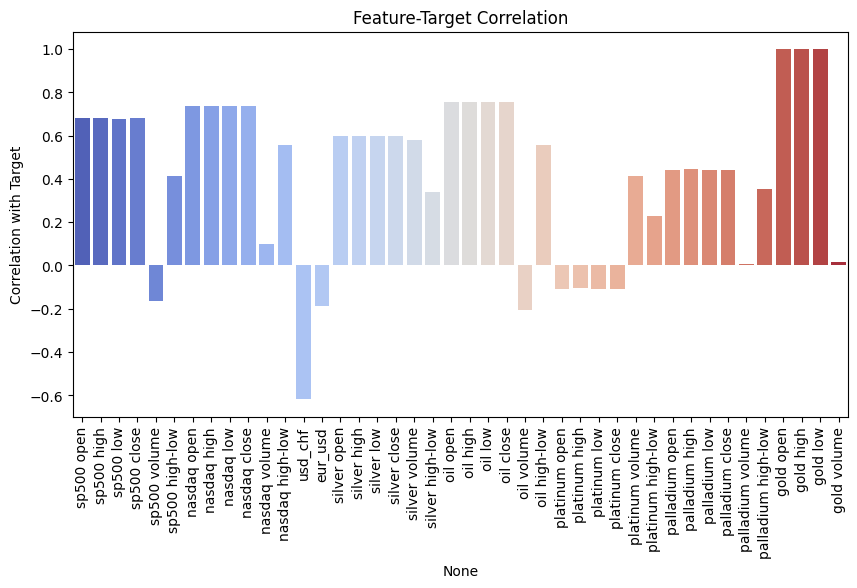

In [75]:
# barplot to check 
# Plot bar chart of correlations with target
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.ylabel("Correlation with Target")
plt.title("Feature-Target Correlation")
plt.show()

- Conclusion on correlation between independent features and target column:
  - There are many columns are highly correlated with target column "gold close".
  - Few fetures are not correlated with target feature

#### 2.3.2. Visualization of relationship: Scatter plots → Feature vs. Target for key features (Top positively/negatively correlated)

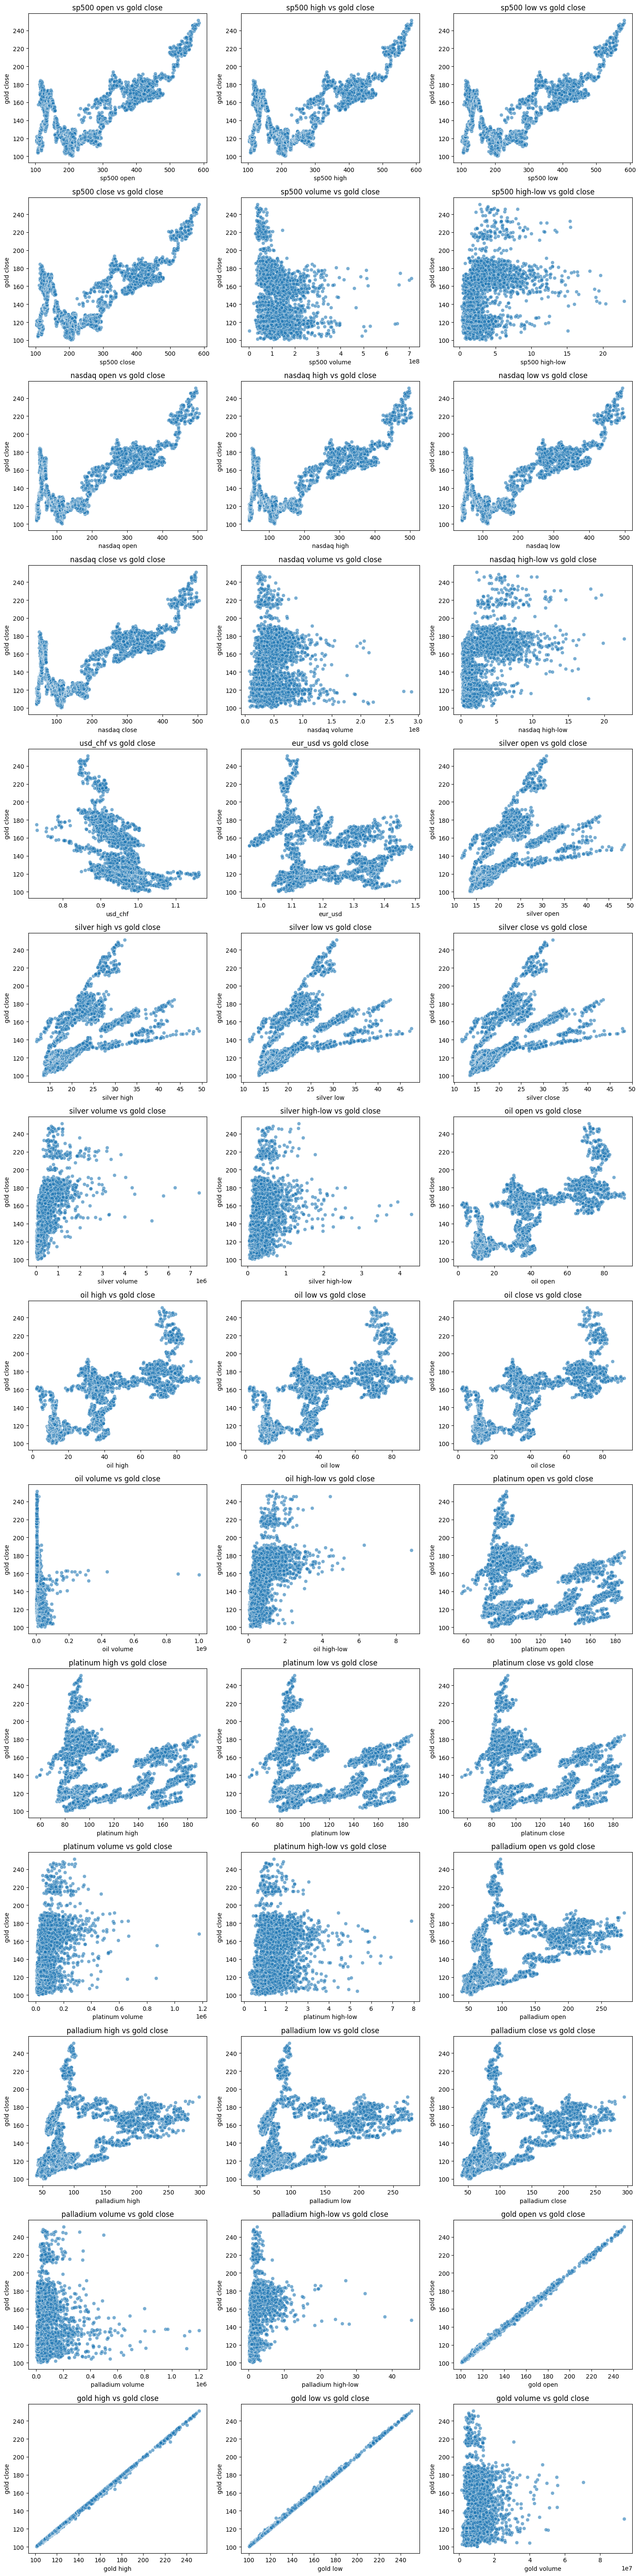

In [77]:
# Define target column
target_col = "gold close"  # Replace with actual target column name

# Get all independent features (excluding the target column)
independent_features = df_cleaned.drop(columns=[target_col]).columns

# Define subplot layout (14 rows, 3 columns)
fig, axes = plt.subplots(14, 3, figsize=(15, 60))  # 15 rows, 3 columns, large height

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through all 45 features
for i, feature in enumerate(independent_features):
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned[target_col], ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{feature} vs {target_col}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- There are many featurese are not correlated with target column.

In [85]:
from scipy.stats import pearsonr
import pandas as pd

def check_correlation(df, target_column):
    results = []

    for column in df.columns:
        if column != target_column:  # Exclude target column itself
            # Compute Pearson correlation and p-value
            corr, p_value = pearsonr(df[column], df[target_column])
            
            # Determine correlation significance
            correlation_status = "Yes" if p_value < 0.05 else "No"

            # Append results
            results.append([column, corr, round(p_value, 6), correlation_status])

    # Convert results to DataFrame
    correlation_df = pd.DataFrame(results, columns=['Column', 'Correlation Coefficient','P-value for PearsonR', 'Correlation Based on P-value'])

    return correlation_df

In [86]:
# check correlation between target column and independent features.
check_correlation(df_cleaned, target_column='gold close')

Column  Correlation Coefficient  P-value for PearsonR  \
0           sp500 open                 0.679817              0.000000   
1           sp500 high                 0.680539              0.000000   
2            sp500 low                 0.679060              0.000000   
3          sp500 close                 0.679835              0.000000   
4         sp500 volume                -0.165838              0.000000   
5       sp500 high-low                 0.415496              0.000000   
6          nasdaq open                 0.737098              0.000000   
7          nasdaq high                 0.737481              0.000000   
8           nasdaq low                 0.736630              0.000000   
9         nasdaq close                 0.737024              0.000000   
10       nasdaq volume                 0.098983              0.000000   
11     nasdaq high-low                 0.557911              0.000000   
12             usd_chf                -0.617495              0.000000   
13             eur_usd                -0.186515              0.000000   
14         silver open                 0.597735              0.000000   
15         silver high                 0.597606              0.000000   
16          silver low                 0.599179              0.000000   
17        silver close                 0.598736              0.000000   
18       silver volume                 0.579194              0.000000   
19     silver high-low                 0.340936              0.000000   
20            oil open                 0.754268              0.000000   
21            oil high                 0.754424              0.000000   
22             oil low                 0.754332              0.000000   
23           oil close                 0.754612              0.000000   
24          oil volume                -0.205725              0.000000   
25        oil high-low                 0.554350              0.000000   
26       platinum open                -0.107488              0.000000   
27       platinum high                -0.104536              0.000000   
28        platinum low                -0.110835              0.000000   
29      platinum close                -0.107234              0.000000   
30     platinum volume                 0.414790              0.000000   
31   platinum high-low                 0.230598              0.000000   
32      palladium open                 0.442204              0.000000   
33      palladium high                 0.443740              0.000000   
34       palladium low                 0.440222              0.000000   
35     palladium close                 0.441910              0.000000   
36    palladium volume                 0.007169              0.663858   
37  palladium high-low                 0.352885              0.000000   
38           gold open                 0.999457              0.000000   
39           gold high                 0.999741              0.000000   
40            gold low                 0.999761              0.000000   
41         gold volume                 0.015968              0.333035   

   Correlation Based on P-value  
0                           Yes  
1                           Yes  
2                           Yes  
3                           Yes  
4                           Yes  
5                           Yes  
6                           Yes  
7                           Yes  
8                           Yes  
9                           Yes  
10                          Yes  
11                          Yes  
12                          Yes  
13                          Yes  
14                          Yes  
15                          Yes  
16                          Yes  
17                          Yes  
18                          Yes  
19                          Yes  
20                          Yes  
21                          Yes  
22                          Yes  
23                          Yes  
24                        

- There are 2 features showing that they are not correlated to target column
- 'gold volume' , 'Palladium volume'

In [125]:
df_cleaned.drop(['palladium volume', 'gold volume'], axis=1, inplace=True)

### 2.4. Multivariate Analysis
- 1. Variance Inflation Factor
- 2. Heat map on corr
- 3. Check PCA and find How many N_commponents we need

#### 2.4.1.  Variance Inflation Factor (VIF) to Check for Multicollinearity

In [88]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # Selecting only numerical independent features
    X = df.select_dtypes(include=['number']).drop(columns=['gold close'], errors='ignore')

    # Adding a constant column for intercept
    X = sm.add_constant(X)

    # Calculating VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Dropping the constant column from the result
    return vif_data[vif_data["Feature"] != "const"].sort_values(by="VIF", ascending=False).reset_index(drop=True)



In [89]:
# Example usage
vif_df = calculate_vif(df_cleaned)
vif_df

Feature           VIF
0           sp500 high           inf
1            sp500 low           inf
2           nasdaq low           inf
3       sp500 high-low           inf
4          nasdaq high           inf
5              oil low           inf
6             oil high           inf
7           silver low           inf
8          silver high           inf
9      nasdaq high-low           inf
10   platinum high-low           inf
11       palladium low           inf
12        platinum low           inf
13       platinum high           inf
14      palladium high           inf
15  palladium high-low  9.007199e+15
16     silver high-low  4.503600e+15
17        oil high-low  1.501200e+15
18        nasdaq close  6.117794e+04
19         sp500 close  4.944519e+04
20         nasdaq open  3.954686e+04
21          sp500 open  3.767941e+04
22           oil close  9.167057e+03
23      platinum close  8.957293e+03
24            oil open  8.463351e+03
25       platinum open  8.437327e+03
26           gold open  7.202313e+03
27           gold high  6.035258e+03
28     palladium close  5.806665e+03
29            gold low  5.542822e+03
30         silver open  4.251844e+03
31      palladium open  3.645932e+03
32        silver close  3.603902e+03
33             eur_usd  8.157223e+00
34        sp500 volume  6.511050e+00
35       nasdaq volume  5.537969e+00
36             usd_chf  3.535388e+00
37         gold volume  2.996622e+00
38       silver volume  2.748881e+00
39    palladium volume  2.020424e+00
40     platinum volume  1.851977e+00
41          oil volume  1.352080e+00

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def drop_high_vif_features(df, threshold=10):
    df = df.copy()  # Avoid modifying the original DataFrame
    df.drop('gold close' , axis =1)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Standardize features
    
    dropped_features = []
    
    while True:
        vif_data = pd.DataFrame()
        vif_data['Feature'] = df_scaled.columns
        vif_data['VIF'] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
        
        max_vif = vif_data['VIF'].max()
        
        if max_vif < threshold:  # Stop when all VIF values are below threshold
            break
        
        drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        df_scaled.drop(columns=[drop_feature], inplace=True)
        df.drop(columns=[drop_feature], axis=1, inplace=True)
        dropped_features.append(drop_feature)
        # print(f"Dropped: {drop_feature} (VIF: {max_vif:.2f})")
    print(df.shape)
    
    return df, dropped_features


In [111]:
new_df , dropped_features = drop_high_vif_features(df_cleaned, threshold=10)

(3677, 18)


In [112]:
new_df.columns

Index(['sp500 volume', 'sp500 high-low', 'nasdaq volume', 'usd_chf', 'eur_usd',
       'silver close', 'silver volume', 'silver high-low', 'oil close',
       'oil volume', 'oil high-low', 'platinum volume', 'platinum high-low',
       'palladium close', 'palladium volume', 'palladium high-low',
       'gold close', 'gold volume'],
      dtype='object')

In [113]:
new_df.describe()

sp500 volume  sp500 high-low  nasdaq volume      usd_chf      eur_usd  \
count  3.677000e+03     3677.000000   3.677000e+03  3677.000000  3677.000000   
mean   1.127705e+08        3.026184   4.542718e+07     0.947309     1.191364   
std    6.915216e+07        2.662347   2.620833e+07     0.052287     0.113478   
min    1.708170e+05        0.300000   7.079300e+06     0.729600     0.961600   
25%    6.742900e+07        1.290000   2.721066e+07     0.912000     1.100000   
50%    9.267393e+07        2.100000   3.915020e+07     0.946800     1.159100   
75%    1.373036e+08        3.780000   5.635949e+07     0.983100     1.295400   
max    7.095045e+08       22.960000   2.882004e+08     1.161400     1.487500   

       silver close  silver volume  silver high-low    oil close  \
count   3677.000000   3.677000e+03      3677.000000  3677.000000   
mean      21.422308   3.861190e+05         0.373303    34.658188   
std        6.233822   4.980778e+05         0.340367    21.874607   
min       11.640000   1.494100e+04         0.040000     2.130000   
25%       16.480000   9.494200e+04         0.170000    13.030000   
50%       19.720000   2.087270e+05         0.280000    33.960000   
75%       24.530000   5.048810e+05         0.450000    42.050000   
max       48.200000   7.374159e+06         4.310000    91.990000   

         oil volume  oil high-low  platinum volume  platinum high-low  \
count  3.677000e+03   3677.000000     3.677000e+03        3677.000000   
mean   1.633186e+07      0.743972     8.964628e+04           1.400269   
std    3.052597e+07      0.672679     8.420085e+04           0.781320   
min    7.346540e+05      0.058000     4.833000e+03           0.237900   
25%    4.647785e+06      0.290000     3.570000e+04           0.864900   
50%    9.331094e+06      0.530000     6.450500e+04           1.229900   
75%    2.115204e+07      0.960000     1.125590e+05           1.740000   
max    9.989044e+08      8.830000     1.173733e+06           7.895000   

       palladium close  palladium volume  palladium high-low   gold close  \
count      3677.000000      3.677000e+03         3677.000000  3677.000000   
mean        108.978429      7.173539e+04            2.251415   145.369832   
std          57.696819      9.814013e+04            2.549639    29.462475   
min          40.090000      3.157000e+03            0.230000   100.500000   
25%          68.780000      2.089900e+04            0.870000   120.590000   
50%          83.130000      3.831700e+04            1.410000   137.661000   
75%         141.620000      8.398400e+04            2.680000   167.800000   
max         295.000000      1.199042e+06           45.392300   251.270000   

        gold volume  
count  3.677000e+03  
mean   9.683023e+06  
std    6.202478e+06  
min    1.436508e+06  
25%    5.809803e+06  
50%    8.102071e+06  
75%    1.158939e+07  
max    9.369811e+07

In [114]:
print(dropped_features)

['sp500 high', 'nasdaq high', 'silver high', 'oil high', 'platinum high', 'palladium high', 'nasdaq low', 'sp500 low', 'oil low', 'platinum low', 'sp500 close', 'silver low', 'palladium low', 'gold high', 'gold low', 'nasdaq open', 'gold open', 'platinum open', 'oil open', 'palladium open', 'silver open', 'sp500 open', 'platinum close', 'nasdaq close', 'nasdaq high-low']


In [116]:
from sklearn.feature_selection import f_regression
import pandas as pd

def multivariate_hypothesis_testing(df, target_column):
    """
    Performs ANOVA (F-Test) to check if independent features significantly influence the target variable.

    Parameters:
    df (pd.DataFrame): The dataset containing independent and target variables.
    target_column (str): The name of the target column.

    Returns:
    pd.DataFrame: A DataFrame with feature names, p-values, and significance.
    """
    # Separate independent and target variables
    X = df.drop(columns=[target_column])  # Independent features
    y = df[target_column]  # Target column

    # Perform ANOVA F-Test
    f_values, p_values = f_regression(X, y)

    # Create DataFrame with results
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'p_value': p_values,
        'Significant': ['Yes' if p < 0.05 else 'No' for p in p_values]
    })

    return results_df


multi_df = multivariate_hypothesis_testing(df_cleaned, target_column='gold close')

In [117]:
multi_df

Feature        p_value Significant
0           sp500 open   0.000000e+00         Yes
1           sp500 high   0.000000e+00         Yes
2            sp500 low   0.000000e+00         Yes
3          sp500 close   0.000000e+00         Yes
4         sp500 volume   4.373845e-24         Yes
5       sp500 high-low  1.847543e-153         Yes
6          nasdaq open   0.000000e+00         Yes
7          nasdaq high   0.000000e+00         Yes
8           nasdaq low   0.000000e+00         Yes
9         nasdaq close   0.000000e+00         Yes
10       nasdaq volume   1.800172e-09         Yes
11     nasdaq high-low  6.225645e-300         Yes
12             usd_chf   0.000000e+00         Yes
13             eur_usd   3.887432e-30         Yes
14         silver open   0.000000e+00         Yes
15         silver high   0.000000e+00         Yes
16          silver low   0.000000e+00         Yes
17        silver close   0.000000e+00         Yes
18       silver volume   0.000000e+00         Yes
19     silver high-low  9.492574e-101         Yes
20            oil open   0.000000e+00         Yes
21            oil high   0.000000e+00         Yes
22             oil low   0.000000e+00         Yes
23           oil close   0.000000e+00         Yes
24          oil volume   1.965929e-36         Yes
25        oil high-low  2.358748e-295         Yes
26       platinum open   6.378401e-11         Yes
27       platinum high   2.095780e-10         Yes
28        platinum low   1.591204e-11         Yes
29      platinum close   7.075334e-11         Yes
30     platinum volume  6.798817e-153         Yes
31   platinum high-low   1.411469e-45         Yes
32      palladium open  6.818210e-176         Yes
33      palladium high  3.025176e-177         Yes
34       palladium low  3.698525e-174         Yes
35     palladium close  1.234740e-175         Yes
36    palladium volume   6.638577e-01          No
37  palladium high-low  2.759531e-108         Yes
38           gold open   0.000000e+00         Yes
39           gold high   0.000000e+00         Yes
40            gold low   0.000000e+00         Yes
41         gold volume   3.330349e-01          No

In [ ]:
# check with new_df which is created after vif dropping features
multivariate_hypothesis_testing(new_df, target_column='gold close')

Feature        p_value Significant
0         sp500 volume   4.373845e-24         Yes
1       sp500 high-low  1.847543e-153         Yes
2        nasdaq volume   1.800172e-09         Yes
3              usd_chf   0.000000e+00         Yes
4              eur_usd   3.887432e-30         Yes
5         silver close   0.000000e+00         Yes
6        silver volume   0.000000e+00         Yes
7      silver high-low  9.492574e-101         Yes
8            oil close   0.000000e+00         Yes
9           oil volume   1.965929e-36         Yes
10        oil high-low  2.358748e-295         Yes
11     platinum volume  6.798817e-153         Yes
12   platinum high-low   1.411469e-45         Yes
13     palladium close  1.234740e-175         Yes
14    palladium volume   6.638577e-01          No
15  palladium high-low  2.759531e-108         Yes
16         gold volume   3.330349e-01          No

In [119]:
# drop 2 columns from new_df 
new_df.drop(['palladium volume', 'gold volume'], axis= 1, inplace=True)

#### 2.4.2. Heatmap on corr of new_df after vif

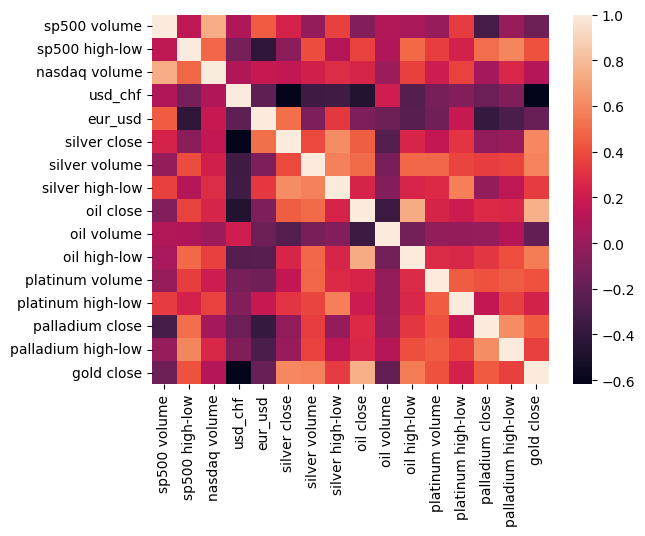

In [120]:
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

#### 2.4.3. Check PCA and find How many N_commponents we need

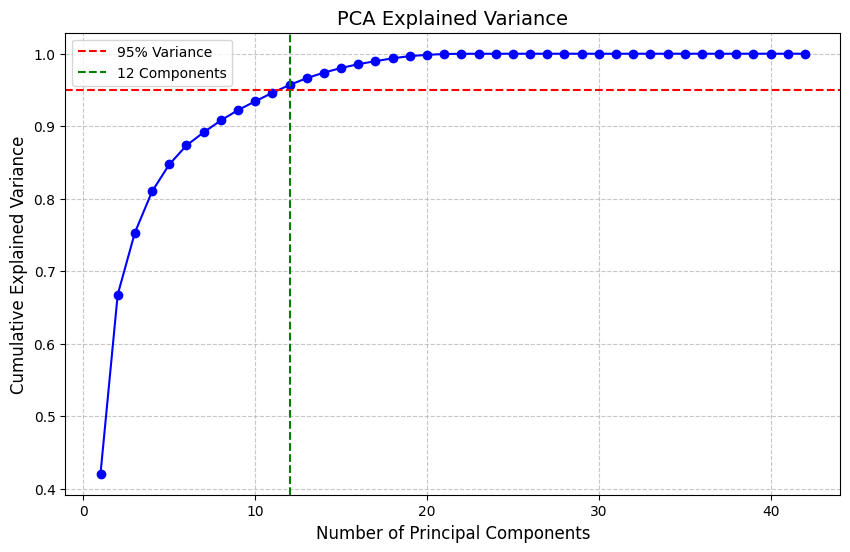

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df_cleaned.drop('gold close', axis=1)
# Standardize Data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cumulative Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_needed = np.argmax(cumulative_variance >= 0.95) + 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')

# Add 95% Variance Line
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")

# Add Vertical Line at Required Components
plt.axvline(x=n_components_needed, color='g', linestyle='--', label=f"{n_components_needed} Components")

# Add Grid
plt.grid(True, linestyle='--', alpha=0.7, which='both')

# Labels & Title
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.title("PCA Explained Variance", fontsize=14)
plt.legend()
plt.show()

In [126]:
df_cleaned

sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0         114.49      115.14    114.420       114.93   115646960.0   
1         114.73      114.84    113.200       113.64   212252769.0   
3         113.62      115.13    113.590       115.06   138671890.0   
4         114.28      114.45    112.980       113.89   216330645.0   
5         113.92      114.27    111.560       111.70   344747028.0   
...          ...         ...        ...          ...           ...   
3895      576.05      580.33    575.910       579.58    42267994.0   
3897      584.59      584.90    578.545       579.78    54203636.0   
3898      579.78      582.83    578.960       582.30    30725436.0   
3899      585.91      586.12    582.160       582.35    34393714.0   
3900      584.07      585.39    582.580       584.59    37416801.0   

      sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
0              0.720        46.26       46.520     46.2200         46.39   
1              1.640        46.46       46.550     45.6500         45.85   
3              1.540        45.96       46.640     45.9500         46.59   
4              1.470        46.27       46.604     45.4300         45.92   
5              2.710        46.06       46.350     45.3000         45.49   
...              ...          ...          ...         ...           ...   
3895           4.420       490.74      494.390    490.1700        493.36   
3897           6.355       497.83      498.500    488.6800        490.85   
3898           3.870       491.18      491.690    487.5700        490.91   
3899           3.960       496.44      496.490    491.1901        491.25   
3900           2.810       494.06      495.570    493.3000        494.47   

      nasdaq volume  nasdaq high-low  usd_chf  eur_usd  silver open  \
0        75209000.0           0.3000   1.0206   1.4478        18.58   
1       126849300.0           0.9000   1.0264   1.4376        18.54   
3        84388200.0           0.6900   1.0340   1.4269        18.53   
4       145680000.0           1.1740   1.0453   1.4094        18.31   
5       204939600.0           1.0500   1.0426   1.4106        17.82   
...             ...              ...      ...      ...          ...   
3895     20644497.0           4.2200   0.8574   1.0942        29.98   
3897     34784506.0           9.8200   0.8621   1.0899        29.89   
3898     22996776.0           4.1200   0.8642   1.0873        30.53   
3899     27210658.0           5.2999   0.8654   1.0837        30.31   
3900     25335030.0           2.2700   0.8659   1.0854        30.86   

      silver high  silver low  silver close  silver volume  silver high-low  \
0           18.70     18.4500         18.66        69804.0           0.2500   
1           18.54     18.3600         18.41       205106.0           0.1800   
3           18.79     18.5000         18.79       130552.0           0.2900   
4           18.31     17.7800         17.86       230907.0           0.5300   
5           17.91     17.3200         17.38       198067.0           0.5900   
...           ...         ...           ...            ...              ...   
3895        30.23     29.9600         30.14       553812.0           0.2700   
3897        30.26     29.7700         30.09       570678.0           0.4900   
3898        30.73     30.1599         30.28       740840.0           0.5701   
3899        30.58     29.9150         30.25       675311.0           0.6650   
3900        32.17     30.8300         32.12      1167147.0           1.3400   

      oil open  oil high  oil low  oil close  oil volume  oil high-low  \
0        39.30   39.4400  38.8800      39.06   8575821.0        0.5600   
1        38.97   39.0200  38.2800      38.40  12615299.0        0.7400   
3        38.07   38.9499  38.0300      38.93   8180157.0        0.9199   
4        38.23   38.3500  37.8800      37.89  11438685.0        0.4700   
5        38.22   38.4100  37.0900      37.24  13716561.0        1.3200   
...   

### 3. Save cleaned data in a csv file..

In [132]:
# save to csv
import os
file_path = os.path.join( 'data', 'cleaned_data.csv')
df_cleaned.to_csv(file_path, index=False)


In [133]:
df = pd.read_csv('data/cleaned_data.csv')
df

sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0         114.49      115.14    114.420       114.93   115646960.0   
1         114.73      114.84    113.200       113.64   212252769.0   
2         113.62      115.13    113.590       115.06   138671890.0   
3         114.28      114.45    112.980       113.89   216330645.0   
4         113.92      114.27    111.560       111.70   344747028.0   
...          ...         ...        ...          ...           ...   
3672      576.05      580.33    575.910       579.58    42267994.0   
3673      584.59      584.90    578.545       579.78    54203636.0   
3674      579.78      582.83    578.960       582.30    30725436.0   
3675      585.91      586.12    582.160       582.35    34393714.0   
3676      584.07      585.39    582.580       584.59    37416801.0   

      sp500 high-low  nasdaq open  nasdaq high  nasdaq low  nasdaq close  \
0              0.720        46.26       46.520     46.2200         46.39   
1              1.640        46.46       46.550     45.6500         45.85   
2              1.540        45.96       46.640     45.9500         46.59   
3              1.470        46.27       46.604     45.4300         45.92   
4              2.710        46.06       46.350     45.3000         45.49   
...              ...          ...          ...         ...           ...   
3672           4.420       490.74      494.390    490.1700        493.36   
3673           6.355       497.83      498.500    488.6800        490.85   
3674           3.870       491.18      491.690    487.5700        490.91   
3675           3.960       496.44      496.490    491.1901        491.25   
3676           2.810       494.06      495.570    493.3000        494.47   

      nasdaq volume  nasdaq high-low  usd_chf  eur_usd  silver open  \
0        75209000.0           0.3000   1.0206   1.4478        18.58   
1       126849300.0           0.9000   1.0264   1.4376        18.54   
2        84388200.0           0.6900   1.0340   1.4269        18.53   
3       145680000.0           1.1740   1.0453   1.4094        18.31   
4       204939600.0           1.0500   1.0426   1.4106        17.82   
...             ...              ...      ...      ...          ...   
3672     20644497.0           4.2200   0.8574   1.0942        29.98   
3673     34784506.0           9.8200   0.8621   1.0899        29.89   
3674     22996776.0           4.1200   0.8642   1.0873        30.53   
3675     27210658.0           5.2999   0.8654   1.0837        30.31   
3676     25335030.0           2.2700   0.8659   1.0854        30.86   

      silver high  silver low  silver close  silver volume  silver high-low  \
0           18.70     18.4500         18.66        69804.0           0.2500   
1           18.54     18.3600         18.41       205106.0           0.1800   
2           18.79     18.5000         18.79       130552.0           0.2900   
3           18.31     17.7800         17.86       230907.0           0.5300   
4           17.91     17.3200         17.38       198067.0           0.5900   
...           ...         ...           ...            ...              ...   
3672        30.23     29.9600         30.14       553812.0           0.2700   
3673        30.26     29.7700         30.09       570678.0           0.4900   
3674        30.73     30.1599         30.28       740840.0           0.5701   
3675        30.58     29.9150         30.25       675311.0           0.6650   
3676        32.17     30.8300         32.12      1167147.0           1.3400   

      oil open  oil high  oil low  oil close  oil volume  oil high-low  \
0        39.30   39.4400  38.8800      39.06   8575821.0        0.5600   
1        38.97   39.0200  38.2800      38.40  12615299.0        0.7400   
2        38.07   38.9499  38.0300      38.93   8180157.0        0.9199   
3        38.23   38.3500  37.8800      37.89  11438685.0        0.4700   
4        38.22   38.4100  37.0900      37.24  13716561.0        1.3200   
...   